### Extract upper and lower triangle Matrix for given Matrix A


In [40]:
import numpy as np
A = np.array([[10, -1, 2, 0],
              [-1, 11, -1, 3],
              [2, -1, 10, -1],
              [0, 3, -1, 8]])

print(A)

[[10 -1  2  0]
 [-1 11 -1  3]
 [ 2 -1 10 -1]
 [ 0  3 -1  8]]


In [60]:
U = np.triu(A) 
U

array([[10, -1,  2,  0],
       [ 0, 11, -1,  3],
       [ 0,  0, 10, -1],
       [ 0,  0,  0,  8]])

In [46]:
L = np.tril(A)
L

array([[10,  0,  0,  0],
       [-1, 11,  0,  0],
       [ 2, -1, 10,  0],
       [ 0,  3, -1,  8]])

In [91]:
arr = np.array(np.diag(A))
D = np.diag(arr)
D

array([[10,  0,  0,  0],
       [ 0, 11,  0,  0],
       [ 0,  0, 10,  0],
       [ 0,  0,  0,  8]])

In [47]:
off_diag_low= D-L
off_diag_low

array([[ 0,  0,  0,  0],
       [ 1,  0,  0,  0],
       [-2,  1,  0,  0],
       [ 0, -3,  1,  0]])

In [48]:
off_diag_up= D-U
off_diag_up

array([[ 0,  1, -2,  0],
       [ 0,  0,  1, -3],
       [ 0,  0,  0,  1],
       [ 0,  0,  0,  0]])

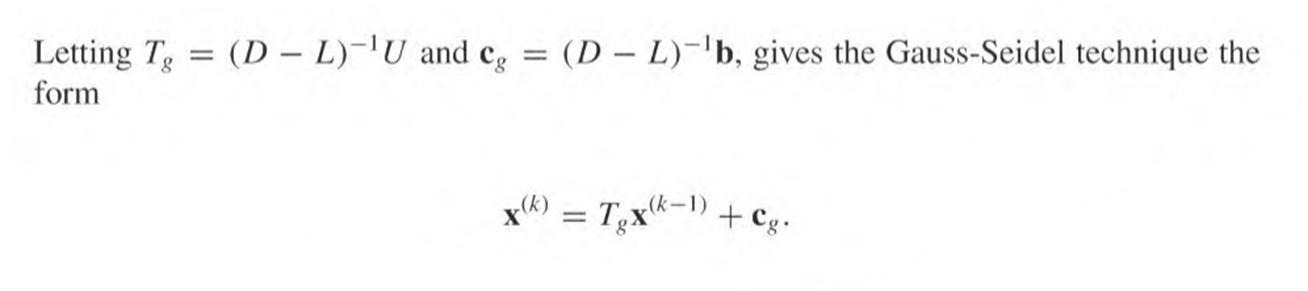

In [49]:
Tg= np.linalg.inv(D-off_diag_low)@off_diag_up
Tg

array([[ 0.        ,  0.1       , -0.2       ,  0.        ],
       [ 0.        ,  0.00909091,  0.07272727, -0.27272727],
       [ 0.        , -0.01909091,  0.04727273,  0.07272727],
       [ 0.        , -0.00579545, -0.02136364,  0.11136364]])

In [74]:
b= np.array([6, 25, -11, 15])
b

array([  6,  25, -11,  15])

In [75]:
cg= np.linalg.inv(D-off_diag_low)@b
cg

array([ 0.6       ,  2.32727273, -0.98727273,  0.87886364])

In [92]:
x0=np.array([0, 0, 0, 0]) #initial X 
x0

array([0, 0, 0, 0])

In [94]:
x= Tg@x0 + cg # create first approximate for solution
x

array([ 0.6       ,  2.32727273, -0.98727273,  0.87886364])

In [95]:
for i in range(1, 9):
    x= Tg@x + cg
    print(f'x[{i}]= {x}'')

x[1]= [ 1.03018182  2.03693802 -1.0144562   0.98434122]
x[2]= [ 1.00658504  2.00355502 -1.00252738  0.99835095]
x[3]= [ 1.00086098  2.00029825 -1.00030728  0.99984975]
x[4]= [ 1.00009128  2.00002134 -1.00003115  0.9999881 ]
x[5]= [ 1.00000836  2.00000117 -1.00000275  0.99999922]
x[6]= [ 1.00000067  2.00000002 -1.00000021  0.99999996]
x[7]= [ 1.00000004  1.99999999 -1.00000001  1.        ]
x[8]= [ 1.  2. -1.  1.]
